### 압축 데이터 병합

In [1]:
import os
import pandas as pd

In [2]:
merged_data = []

folder_path = 'C:/Users/coops2022/Sincewin/Acceleration_Data/20231023'

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)
        merged_data.append(data)

combined_data = pd.concat(merged_data, ignore_index=True)
combined_data.sort_values(by='Time', inplace=True)

output_file = '0822_0902_1hz.csv'
combined_data.to_csv(output_file, index=False)

In [3]:
combined_data

,Time,x,y,z
0,2023.08.22 15:26:18.991,-0.033353,-0.007399,-0.007402
1,2023.08.22 15:26:19.989,-0.033386,-0.007403,-0.007393
2,2023.08.22 15:26:20.987,-0.034551,-0.007400,-0.007404
3,2023.08.22 15:26:21.985,-0.033582,-0.007401,-0.007397
4,2023.08.22 15:26:22.987,-0.033846,-0.007405,-0.007406
...,...,...,...,...
1110245,2023.09.04 15:28:01.327,-0.007479,-0.006328,-0.007035
1110246,2023.09.04 15:28:02.325,-0.007446,-0.006378,-0.004523
1110247,2023.09.04 15:28:03.331,-0.007509,-0.006344,-0.005129
1110248,2023.09.04 15:28:04.333,-0.007664,-0.006430,-0.005698


In [4]:
data = combined_data
data

,Time,x,y,z
0,2023.08.28 01:20:09.446,-0.007947,-0.006819,-0.007171
1,2023.08.28 01:20:10.444,-0.007962,-0.006925,-0.007227
2,2023.08.28 01:20:11.450,-0.007944,-0.006814,-0.007200
3,2023.08.28 01:20:12.452,-0.008017,-0.006852,-0.007244
4,2023.08.28 01:20:13.442,-0.007992,-0.006908,-0.007241
...,...,...,...,...
88417,2023.08.29 01:53:31.131,-0.007976,-0.006834,-0.001624
88418,2023.08.29 01:53:32.134,-0.007836,-0.007055,-0.011875
88419,2023.08.29 01:53:33.124,-0.008005,-0.007104,-0.004726
88420,2023.08.29 01:53:34.122,-0.007799,-0.007007,-0.009391


### 시각화

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

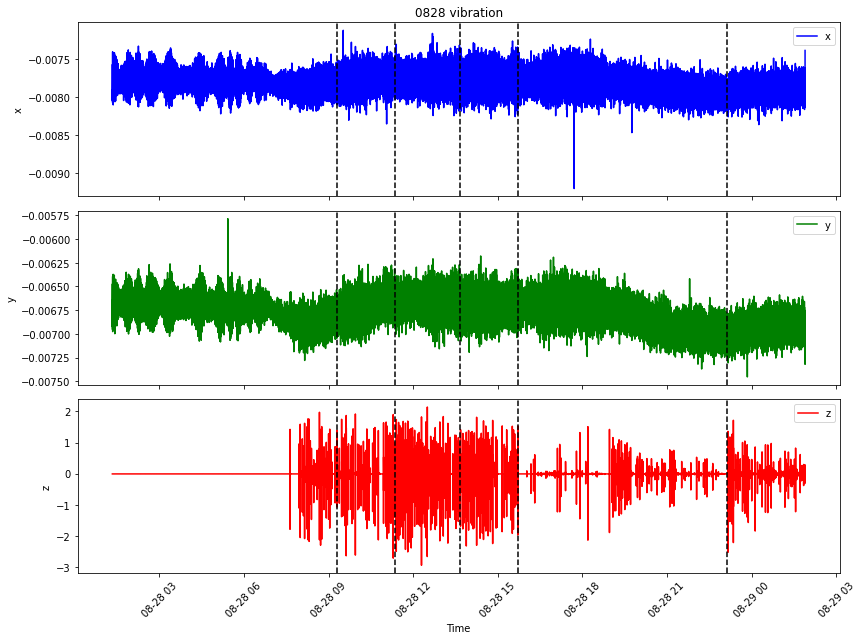

In [6]:
data['Time'] = pd.to_datetime(data['Time'], format='%Y.%m.%d %H:%M:%S.%f')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

ax1.plot(data['Time'], data['x'], label='x', color='blue')
ax1.set_ylabel('x')
ax1.set_title('0828 vibration')
ax1.legend()

ax2.plot(data['Time'], data['y'], label='y', color='green')
ax2.set_ylabel('y')
ax2.legend()

ax3.plot(data['Time'], data['z'], label='z', color='red')
ax3.set_xlabel('Time')
ax3.set_ylabel('z')
ax3.legend()

red_lines = [
    "2023-08-28 23:08:00",
    "2023-08-28 15:42:00",
    "2023-08-28 13:39:00",
    "2023-08-28 11:21:00",
    "2023-08-28 09:17:00"
]

for line in red_lines:
    line_time = pd.to_datetime(line, format='%Y-%m-%d %H:%M:%S')
    ax1.axvline(x=line_time, color='black', linestyle='--')
    ax2.axvline(x=line_time, color='black', linestyle='--')
    ax3.axvline(x=line_time, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()